<a href="https://colab.research.google.com/github/OneMoreGate/MIPT_IP_Law/blob/main/libgen_scimag_queries_db_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# О блокноте

**Цель блокнота**: получить информацию о динамике публикаций и трендах в интересующей тематике.

**Метод**: динамическое тематическое моделирование, то есть анализ того, как представлена та или иная тема с течением времени. Подробнее [тут](https://maartengr.github.io/BERTopic/getting_started/topicsovertime/topicsovertime.html).

**Как это работает**: из базы данных статей [Либгена](https://libgen.is/scimag/) извлекается информация о статьях в виде названия и года публикации. Сначала мы получаем статистику по числу публикаций, а затем можем посмотреть динамику тем, которые есть в названиях статей.

**Как пользоваться**: в ячейке ниже внутри кавычек нужно ввести запрос в формате: `words = ['мой запрос']`. Можно добавлять несколько запросов в формате: `words = ['мой запрос', 'еще один запрос', 'и еще один запрос']` и так далее.

Так как база данных многоязычная, можно вводить запрос на любом языке.

Затем нужно запустить блокнот следующим способом: `"Runtime" -> "Run all"` и дождаться окончания обработки запроса.

**Результат**: при ненулевом числе источников по теме должны появиться визуализации и таблица с источниками.

In [ ]:
words = [


'copyright law'


]

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
%%capture
!pip install --upgrade --no-cache-dir gdown
!pip install bertopic
!pip install sentence-transformers

In [ ]:
!gdown --id 1qZHNmJOWo6rqlG2O4tJbnrJcPiqBLRqA

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1qZHNmJOWo6rqlG2O4tJbnrJcPiqBLRqA
From (redirected): https://drive.google.com/uc?id=1qZHNmJOWo6rqlG2O4tJbnrJcPiqBLRqA&confirm=t&uuid=1bfbf0a8-de96-455a-94af-2ee84bc449bb
To: /content/scimag.7z
100% 2.86G/2.86G [00:36<00:00, 78.5MB/s]


In [ ]:
!7z e scimag.7z -o/content


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 2862681568 bytes (2731 MiB)

Extracting archive: scimag.7z
--
Path = scimag.7z
Type = 7z
Physical Size = 2862681568
Headers Size = 146
Method = LZMA:23
Solid = -
Blocks = 1

  0%      0% - scimag.db                  1% - scimag.db                  2% - scimag.db                  3% - scimag.db                  4% - scimag.db                  5% - scimag.db                  6% - scimag.db                  7% - scimag.db                  8% - scimag.db

In [ ]:
import sqlite3

In [ ]:
con = sqlite3.connect("./scimag.db")

In [ ]:
c = con.cursor()

In [ ]:
c.execute('''SELECT name FROM sqlite_master WHERE type='table';''')

In [ ]:
print(c.fetchall())

[('scimag',), ('scimag_fts5',), ('scimag_fts5_data',), ('scimag_fts5_idx',), ('scimag_fts5_content',), ('scimag_fts5_docsize',), ('scimag_fts5_config',)]


In [ ]:
c.execute('''SELECT * FROM scimag LIMIT 3;''')

In [ ]:
print(c.fetchall())

[('10.1002/(sici)(1997)5:1<1::aid-nt1>3.0.co;2-8', 'Detection of new spider toxins from a <em>Nephilengys borbonica</em> venom gland using on-line μ-column HPLC continuous flow (FRIT) FAB LC/MS and MS/MS', '1997'), ('10.1002/(sici)(1997)5:1<14::aid-nt2>3.0.co;2-8', 'Identification by flow cytometry of Seiridin, one of the main phytotoxins produced by three <em>Seiridium</em> species pathogenic to cypress', '1997'), ('10.1002/(sici)(1997)5:1<20::aid-nt3>3.0.co;2-6', 'Evaluation of <em>Alternaria</em> and its mycotoxins during ensiling of sunflower seeds', '1997')]


In [ ]:
names = list(map(lambda x: x[0], c.description))

In [ ]:
names

['Doi', 'Title', 'Year']

In [ ]:
%%time

new_list = []
for w in words:
    # Generate a query
    query = """ SELECT * FROM scimag
                WHERE Title LIKE '%%%s%%'""" % w
    # Execute that query and get results
    c.execute(query)
    result_all = c.fetchall()
    # Add those results to your final list
    for i in result_all:
        new_list.append(i)

CPU times: user 25.5 s, sys: 5.89 s, total: 31.4 s
Wall time: 1min


In [ ]:
df = pd.DataFrame(new_list, columns =['doi', 'title', 'year'])

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.head()

,doi,title,year
0,10.1002/(sici)1097-4571(199712)48:12<1150::aid...,Technology and copyright law: A guidebook for ...,1997
1,10.1002/bult.15,Information Organizations Address Copyright La...,1996
2,10.1002/ir.9602,Copyright Law and Institutional Researchers,1997
3,10.1016/0001-6160(78)90074-3,Statement on the new us copyright law for edit...,1978
4,10.1016/0001-6160(78)90090-1,Statement on the new US copyright law for edit...,1978


In [ ]:
df.shape

(908, 3)

In [ ]:
df['doi'] = df['doi'].astype(str)
df['doi'] = df['doi'].str.lower()

In [ ]:
df['year'] = df['year'].str.extract('^(\d{4})')

In [ ]:
df['year'].replace('', np.nan, inplace=True)

df['year'].replace('nan', np.nan, inplace=True)

df = df[df['year'].notna()]

df = df[df['year'].notnull()]

In [ ]:
df['year'] = df['year'].astype(int)

In [ ]:
print(df['year'].min())
print(df['year'].max())

1842
2020


In [ ]:
df_years = df[~df['year'].isin(df['year'].value_counts().lt(2).pipe(lambda s: s[s].index))]

In [ ]:
df_years = df_years.drop_duplicates(subset=['doi', 'title', 'year'], keep='first')

In [ ]:
df_years.head()

,doi,title,year
0,10.1002/(sici)1097-4571(199712)48:12<1150::aid...,Technology and copyright law: A guidebook for ...,1997
1,10.1002/bult.15,Information Organizations Address Copyright La...,1996
2,10.1002/ir.9602,Copyright Law and Institutional Researchers,1997
3,10.1016/0001-6160(78)90074-3,Statement on the new us copyright law for edit...,1978
4,10.1016/0001-6160(78)90090-1,Statement on the new US copyright law for edit...,1978


In [ ]:
df_years.shape

(881, 3)

In [ ]:
df_years = df_years.sort_values('year')

In [ ]:
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

(array([1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020'),
  Text(2040.0, 0, '2040')])

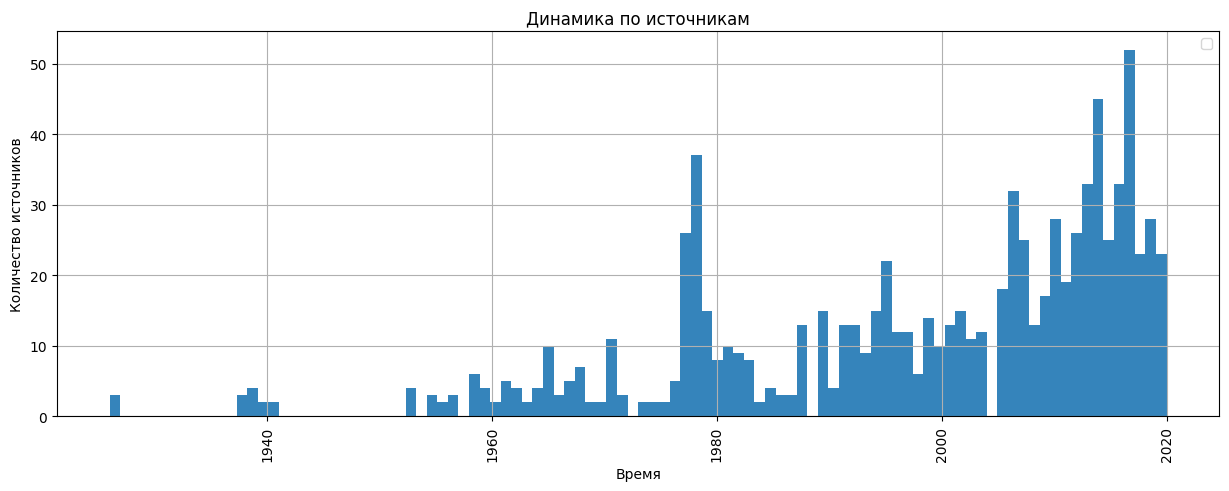

In [ ]:
df_years['year'].hist(bins=100, figsize = (15,5), alpha=0.9)
pl.title('Динамика по источникам')
pl.xlabel('Время')
pl.ylabel('Количество источников')
plt.legend(loc="upper right")
plt.xticks(rotation='vertical')

In [ ]:
timestamps = df_years.year.to_list()
corpus = df_years.title.to_list()

[Мануал для использования библиотеки](https://maartengr.github.io/BERTopic/getting_started/quickstart/quickstart.html).

In [ ]:
from umap import UMAP
from hdbscan import HDBSCAN

In [ ]:
from bertopic import BERTopic
from bertopic.vectorizers import ClassTfidfTransformer
from sentence_transformers import SentenceTransformer

In [ ]:
%%time

sentence_model = SentenceTransformer("paraphrase-multilingual-mpnet-base-v2")

umap_model = UMAP(n_neighbors=3, n_components=3, min_dist=0.05, random_state=123)

hdbscan_model = HDBSCAN(min_cluster_size=10, min_samples=4,
                        prediction_data=True, gen_min_span_tree=True)

ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

topic_model = BERTopic(embedding_model=sentence_model, ctfidf_model=ctfidf_model,
                       umap_model=umap_model, hdbscan_model=hdbscan_model)

topics, probs = topic_model.fit_transform(corpus)

CPU times: user 6.98 s, sys: 1.46 s, total: 8.44 s
Wall time: 8.95 s


In [ ]:
topic_model.visualize_topics()

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(corpus)

100%|██████████| 36/36 [00:00<00:00, 100.88it/s]


In [ ]:
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

In [ ]:
topic_model.visualize_barchart()

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
topics_over_time = topic_model.topics_over_time(corpus, timestamps, nr_bins=20)

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=5)

In [ ]:
df_freq = topic_model.get_topic_info()

In [ ]:
topic_prob_df = pd.DataFrame({"title": corpus, "Topic": topics})

In [ ]:
df_temp = pd.merge(df_freq, topic_prob_df, on='Topic')

In [ ]:
df_final = pd.merge(df_temp, df_years, on='title')

In [ ]:
df_final.head()

,Topic,Count,Name,Representation,Representative_Docs,title,doi,year
0,-1,126,-1_peer_street_graffiti_2011,"[peer, street, graffiti, 2011, acm, authorship...",[ [ACM Press the twentieth SIGCSE technical sy...,The Copyright Law,10.2307/3385451,1938
1,-1,126,-1_peer_street_graffiti_2011,"[peer, street, graffiti, 2011, acm, authorship...",[ [ACM Press the twentieth SIGCSE technical sy...,The Copyright Law,10.1080/00131726509339618,1965
2,-1,126,-1_peer_street_graffiti_2011,"[peer, street, graffiti, 2011, acm, authorship...",[ [ACM Press the twentieth SIGCSE technical sy...,The Copyright Law,10.1300/j123v24n03_19,1994
3,-1,126,-1_peer_street_graffiti_2011,"[peer, street, graffiti, 2011, acm, authorship...",[ [ACM Press the twentieth SIGCSE technical sy...,The Copyright Law,10.2307/3385451,1938
4,-1,126,-1_peer_street_graffiti_2011,"[peer, street, graffiti, 2011, acm, authorship...",[ [ACM Press the twentieth SIGCSE technical sy...,The Copyright Law,10.1080/00131726509339618,1965


In [ ]:
df_final.to_csv(f"./{w}_dataframe.csv")

In [ ]:
topic_model.save(f"./{w}_topic_model")